## Implementing a Neural Network
__source__ : http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
def plot_decision_boundary(model,X,y):
    
    '''
        Plotting the decision boundary of 
        a classification dataset. The function
        takes in a trained model and corresponding
        data points
    '''
    h = 0.0025
    #X - some data in 2dimensional np.array
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # here "model" is your model's prediction (classification) function
    if(type(model) == dict):
        Z = predict(model,np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.axis('off')
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


(200, 2) (200,)


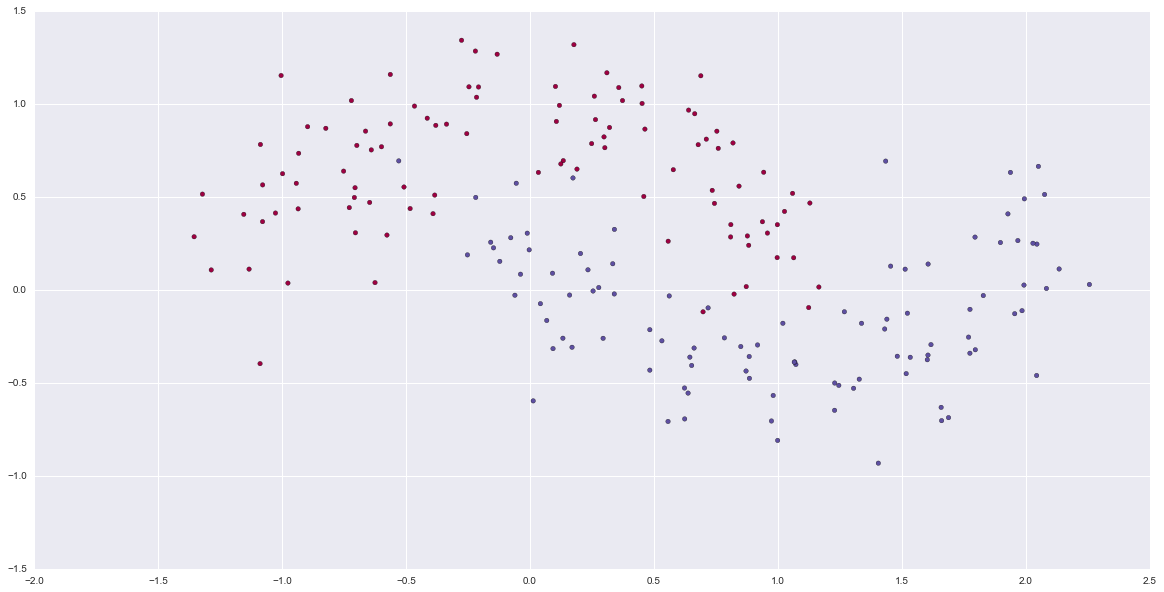

In [4]:
## Generating the Dataset
from sklearn.datasets import make_moons
np.random.seed(0)
X,y = make_moons(200,noise=0.20)
print X.shape,y.shape
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)

### Using a Simple Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

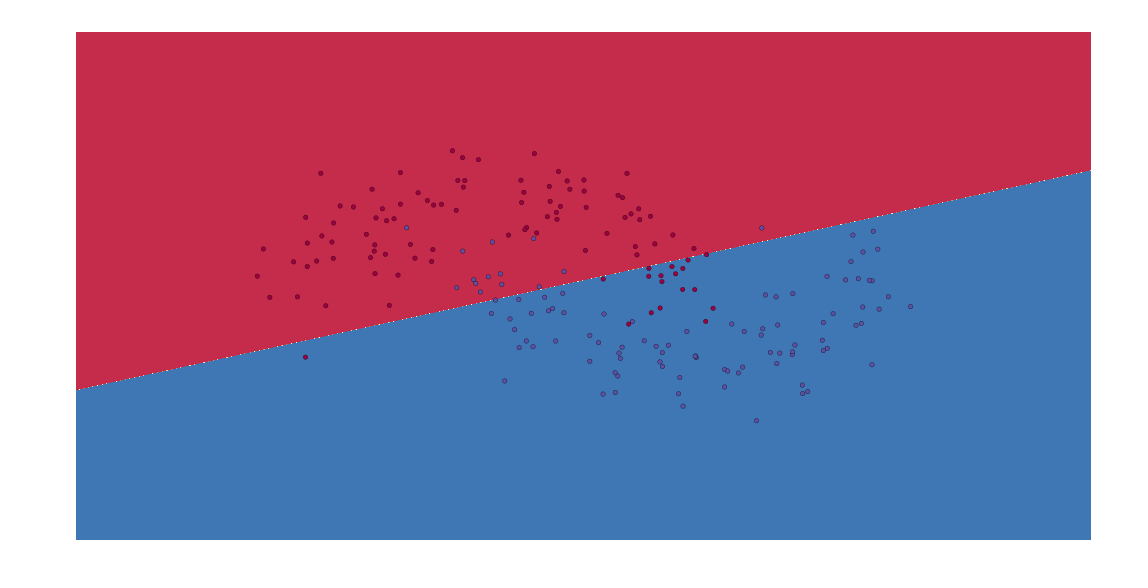

In [6]:
model.fit(X,y)
plot_decision_boundary(model,X,y)

## Implementing a 3 layer Neural Network

In [7]:
nn_input_dim = 2
nn_output_dim = 2
n_examples = len(X)
epsilon = 0.01
lamda = 0.01
print 'Number of neurones in input layer: {}'.format(nn_input_dim)
print 'Number of neurones in output layer: {}'.format(nn_output_dim)
print 'Sample size: {}'.format(n_examples)

Number of neurones in input layer: 2
Number of neurones in output layer: 2
Sample size: 200


In [8]:
def calculate_loss(model):
    
    '''
        Calculates the cross-entropy loss.
        model variable is a dictionary which
        containes the parameters for the model
    '''
    
    W1,W2,b1,b2 = model['W1'],model['W2'],model['b1'],model['b2']
    
    # Performing the forward pass
    z1 = np.dot(X,W1)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2)+b2
    exp_scores = np.exp(z2)
    preds = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    
    # Calculating the cross entropy loss
    correct_logprobs = -np.log(preds[range(n_examples),y])
    data_loss = np.sum(correct_logprobs)
    
    # Adding the regularization term
    data_loss += (lamda/2)*(np.sum(W1**2) + np.sum(W2**2))
    
    return data_loss/n_examples

In [9]:
def predict(model,X):
    '''
        Performs the forward pass and
        returns the prediction class
        for the given input
    '''
    
    W1,W2,b1,b2 = model['W1'],model['W2'],model['b1'],model['b2']
    
    # Perform the forward pass
    z1 = np.dot(X,W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2) + b2
    exp_score = np.exp(z2)
    preds = exp_score/np.sum(exp_score,axis=1,keepdims=True)
    
    # Find classes according to Bayesian Rule
    pred_class = np.argmax(preds,axis=1)
    
    return pred_class

In [10]:
def build_model(nn_hidden_dim,num_passes=2000,print_loss=False):
    '''
        Computes the forward and backward pass.
        Calculates and applies the backpropagation
        method to initialize the weights in each
        pass. Returns a dictionary of all params.
    '''
    # Initialize randomly the paramters
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim,nn_hidden_dim)/np.sqrt(nn_input_dim)
    b1 = np.zeros((1,nn_hidden_dim))
    W2 = np.random.randn(nn_hidden_dim,nn_output_dim)/np.sqrt(nn_hidden_dim)
    b2 = np.ones((1,nn_output_dim))
    
    model = {}
    
    for i in xrange(num_passes):
        
        # Forward Propagation
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2) + b2
        exp_scores = np.exp(z2)
        preds = exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        
        # Backward Propagation
        delta2 = preds
        delta2[range(n_examples),y] -= 1
        dW2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0,keepdims=True)
        delta1 = delta2.dot(W2.T) * (1 - np.tanh(z1)**2)
        dW1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1, axis=0,keepdims=True)
        
        # Adding the regularization terms
        dW1 += lamda*W1
        dW2 += lamda*W2
        
        # Gradient Descent Parameter Update
        W1 += -epsilon*dW1
        W2 += -epsilon*dW2
        b1 += -epsilon*db1
        b2 += -epsilon*db2
        
        model = {'W1':W1,'W2':W2,'b1':b1,'b2':b2}
        
        # Printing the loss
        if print_loss and i%1000 == 0:
            print 'Loss after {} iterations: {}'.format(i,calculate_loss(model))
            
    return model

In [11]:
model = build_model(4,print_loss=True)

Loss after 0 iterations: 0.466461264523
Loss after 1000 iterations: 0.0666852970436


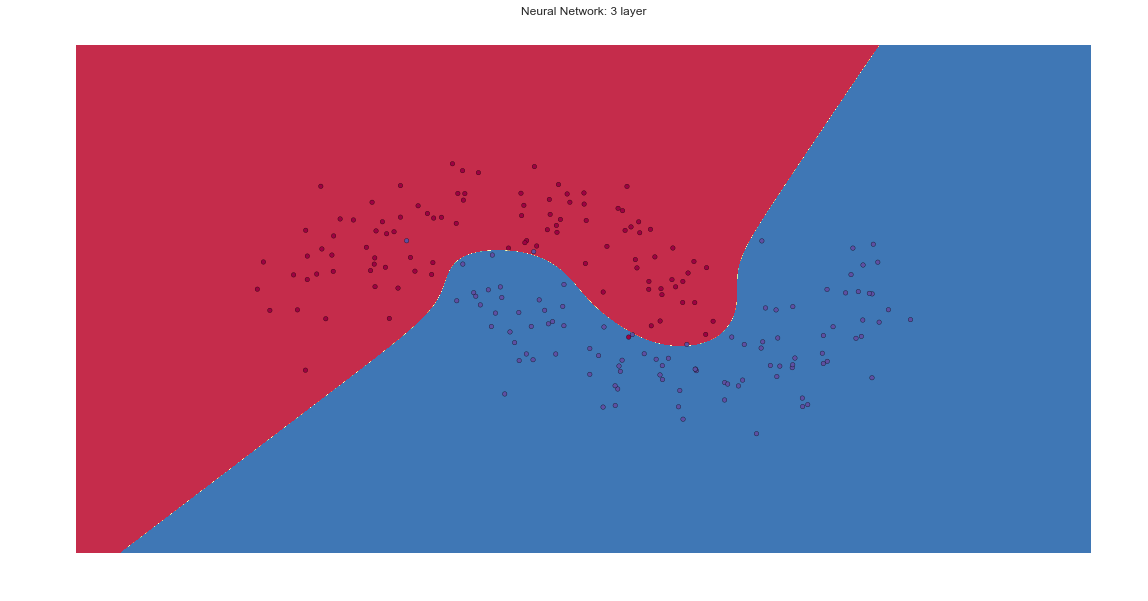

In [12]:
plot_decision_boundary(model,X,y)
plt.title('Neural Network: 3 layer')

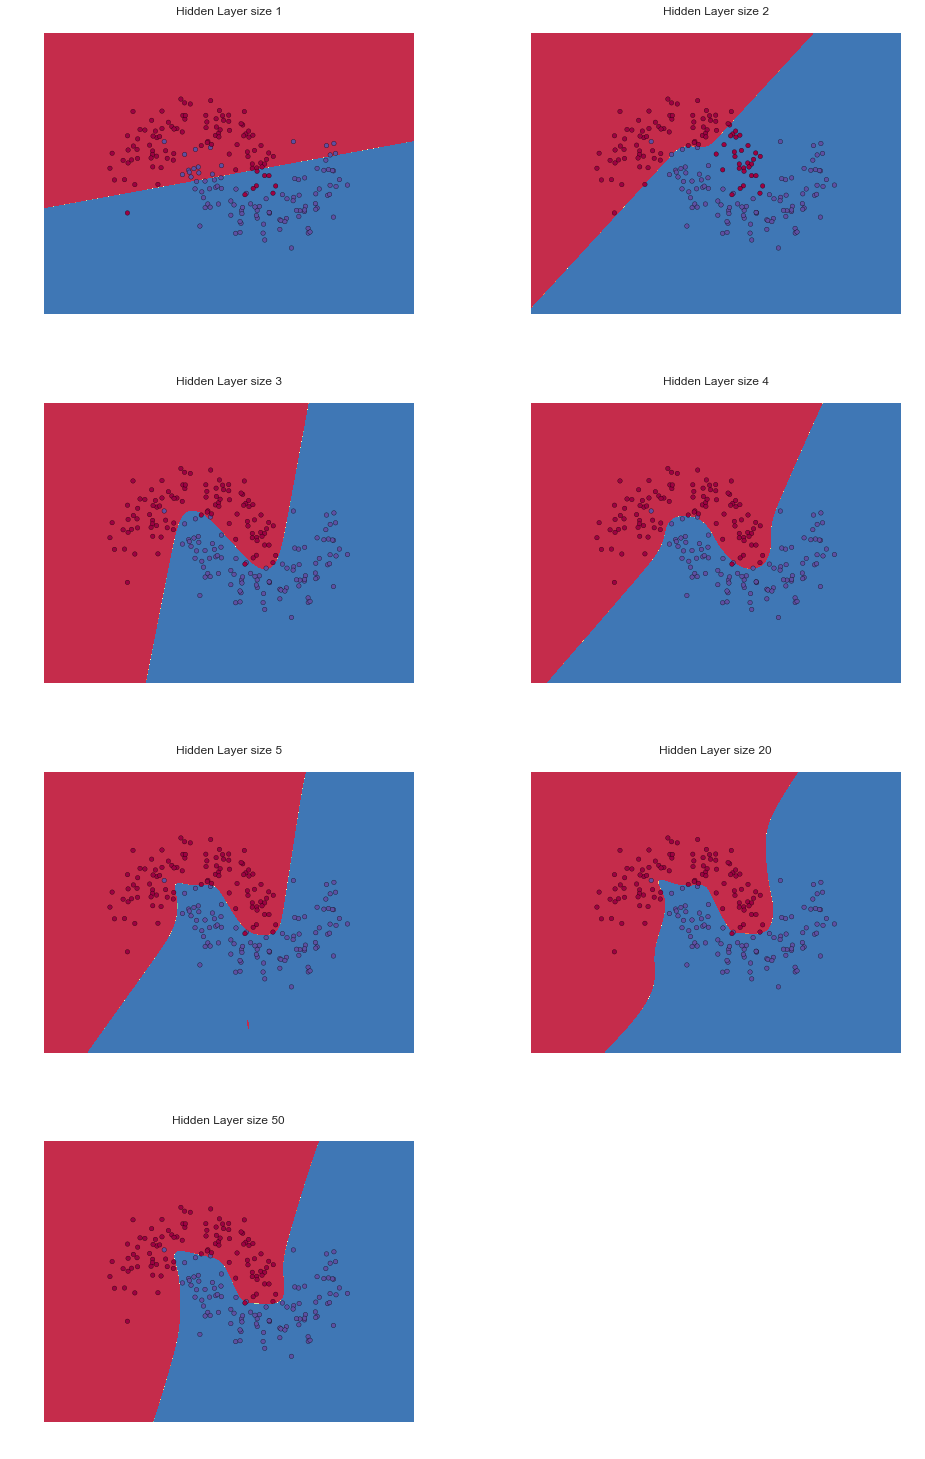

In [13]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(model,X,y)
plt.show()